In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram


In [ ]:
train=pd.read_csv('/content/google_review_ratings.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

In [ ]:
train.dropna(inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5455 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5455 non-null   object 
 1   Category 1   5455 non-null   float64
 2   Category 2   5455 non-null   float64
 3   Category 3   5455 non-null   float64
 4   Category 4   5455 non-null   float64
 5   Category 5   5455 non-null   float64
 6   Category 6   5455 non-null   float64
 7   Category 7   5455 non-null   float64
 8   Category 8   5455 non-null   float64
 9   Category 9   5455 non-null   float64
 10  Category 10  5455 non-null   float64
 11  Category 11  5455 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5455 non-null   float64
 14  Category 14  5455 non-null   float64
 15  Category 15  5455 non-null   float64
 16  Category 16  5455 non-null   float64
 17  Category 17  5455 non-null   float64
 18  Category 18  5455 non-null   float64
 19  Category 19

In [ ]:
train['Category 11']=train['Category 11'].astype('float')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5455 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5455 non-null   object 
 1   Category 1   5455 non-null   float64
 2   Category 2   5455 non-null   float64
 3   Category 3   5455 non-null   float64
 4   Category 4   5455 non-null   float64
 5   Category 5   5455 non-null   float64
 6   Category 6   5455 non-null   float64
 7   Category 7   5455 non-null   float64
 8   Category 8   5455 non-null   float64
 9   Category 9   5455 non-null   float64
 10  Category 10  5455 non-null   float64
 11  Category 11  5455 non-null   float64
 12  Category 12  5455 non-null   float64
 13  Category 13  5455 non-null   float64
 14  Category 14  5455 non-null   float64
 15  Category 15  5455 non-null   float64
 16  Category 16  5455 non-null   float64
 17  Category 17  5455 non-null   float64
 18  Category 18  5455 non-null   float64
 19  Category 19

In [ ]:
train.drop(['User'],axis=1,inplace=True)


In [ ]:
print(train.columns)

Index(['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5',
       'Category 6', 'Category 7', 'Category 8', 'Category 9', 'Category 10',
       'Category 11', 'Category 12', 'Category 13', 'Category 14',
       'Category 15', 'Category 16', 'Category 17', 'Category 18',
       'Category 19', 'Category 20', 'Category 21', 'Category 22',
       'Category 23', 'Category 24'],
      dtype='object')


Kmeans clustering

In [ ]:
inertia=[]
for i in range(1,20):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(train)
  inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<function matplotlib.pyplot.show(close=None, block=None)>

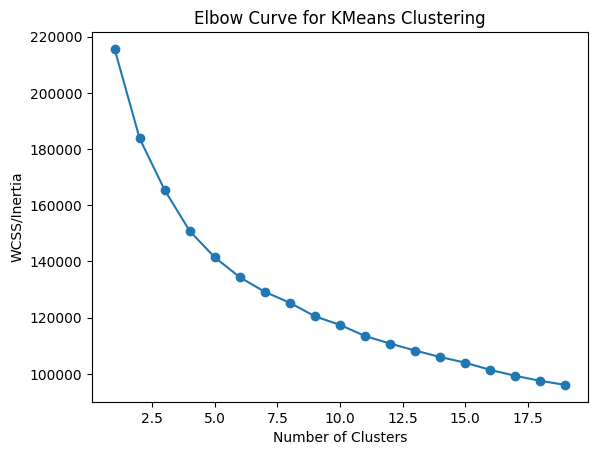

In [ ]:
plt.plot(range(1,20), inertia, 'o-')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS/Inertia")
plt.title("Elbow Curve for KMeans Clustering")
plt.show

In [ ]:
kmeans=KMeans(n_clusters=3,random_state=123)
kmeans.fit(train)
train['Cluster']=kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='Cluster'>

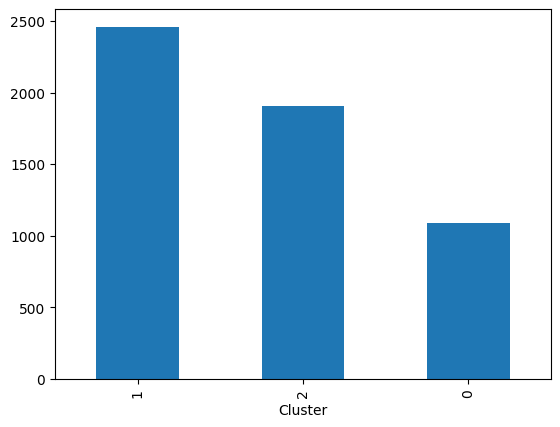

In [ ]:
train['Cluster'].value_counts().plot(kind='bar')

In [ ]:
kmeans.cluster_centers_

array([[2.24457379, 2.73020165, 2.59208066, 2.38588451, 2.10215399,
        1.91896425, 2.00383135, 1.579945  , 1.90560037, 1.61520623,
        1.55026581, 1.412044  , 1.49981668, 1.82496792, 2.32709441,
        1.66552704, 1.7631714 , 1.80233731, 2.27847846, 2.15487626,
        1.80668194, 2.73398717, 2.36344638, 2.45506874],
       [1.09205452, 1.94042311, 1.9162083 , 2.0999105 , 2.25357201,
        2.70848251, 3.91685924, 3.08122457, 4.01905207, 3.57362083,
        3.18189992, 2.49043938, 2.57981286, 2.9225834 , 2.87289666,
        1.06146867, 0.76936127, 0.60867372, 0.70314076, 0.73216029,
        0.69720911, 0.99498779, 0.90333198, 1.06028478],
       [1.47303253, 2.57420252, 3.17016264, 3.9318468 , 4.35998426,
        3.69081322, 3.39461175, 2.39456453, 2.67373033, 2.57522036,
        2.30754984, 1.92827912, 1.89846275, 1.45518888, 1.27682057,
        1.09163694, 0.71513116, 0.53703043, 0.56251312, 0.68275971,
        0.82884575, 2.16026758, 1.86343127, 1.6934575 ]])

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
print(silhouette_score(train, kmeans.fit_predict(train)))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.1541922307993935


Hierarchical clustering

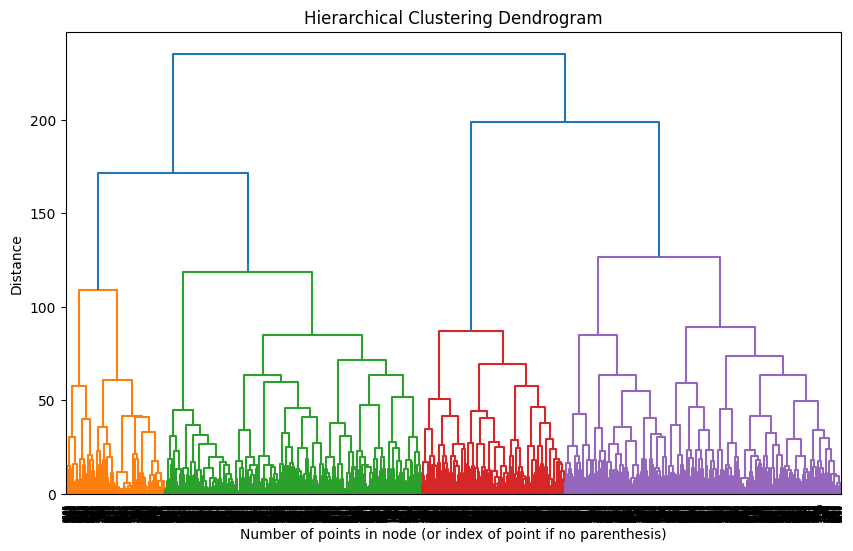

In [ ]:
# Perform hierarchical clustering (linkage calculation)
distance_matrix = linkage(train, method='ward')  # Ward's method for minimizing variance

# Generate the dendrogram
plt.figure(figsize=(10, 6))  # Adjust figure size as desired
dendrogram(distance_matrix, labels=np.arange(len(train)))  # Labels for data points
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis)")
plt.ylabel("Distance")
plt.show()

In [ ]:
distance_matrix

array([[2.00000000e+00, 4.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [1.33800000e+03, 1.34600000e+03, 0.00000000e+00, 2.00000000e+00],
       [6.70000000e+02, 6.74000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.09030000e+04, 1.09040000e+04, 1.71599735e+02, 2.51100000e+03],
       [1.09010000e+04, 1.09050000e+04, 1.98791277e+02, 2.94400000e+03],
       [1.09060000e+04, 1.09070000e+04, 2.35369952e+02, 5.45500000e+03]])

agglomerative clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
agg=AgglomerativeClustering(n_clusters=3)
agg.fit(train)

AgglomerativeClustering(n_clusters=3)

In [ ]:
print(round(silhouette_score(train,agg.fit_predict(train)),2))

0.13
